Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 1
         Function evaluations: 15
         Gradient evaluations: 3
Cost at theta found by fmin: 0.203498
theta:
[-25.16130062   0.20623139   0.20147139]
For a student with scores 45 and 85, we predict an admission probability of 0.776291


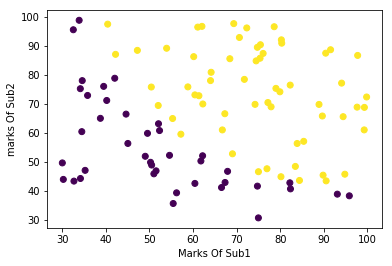

In [134]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fmin
from scipy.optimize import fmin_bfgs
#import CostFunction as cf
#from sigmoid import sigmoid

def sigmoid(z):
#SIGMOID Compute sigmoid functoon
#   J = SIGMOID(z) computes the sigmoid of z.

    from scipy.special import expit 
    import numpy as np

    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

# ====================== YOUR CODE HERE ======================
# Instructions: Compute the sigmoid of each value of z (z can be a matrix,
#               vector or scalar).


    # g = 1/(1 + np.exp(-z))
    g = expit(z)

    return g


def CostFunction(theta,X,y,return_grad=False):
    import numpy as np 
    #from sigmoid import sigmoid
    
    m=len(y)
    J = 0
    grad = np.zeros(theta.shape)
    
    c1 = y * np.transpose(np.log( sigmoid( np.dot(X,theta) ) ))
    c0 = (1-y) * np.transpose(np.log( 1 - sigmoid( np.dot(X,theta) ) ))
    
    J = -(1./m)*(c1+c0).sum()
    
    grad = (1./m) * np.dot(sigmoid( np.dot(X,theta) ).T - y, X).T

    if return_grad == True:
        return J, np.transpose(grad)
    elif return_grad == False:
        return J # for use in fmin/fmin_bfgs optimization function


data = np.loadtxt('data.txt',delimiter=',')
X = data[:,:2]
y = data[:,2]

#Plotting Graph
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('Marks Of Sub1')
plt.ylabel('marks Of Sub2')
plt.show

#Adding Intercept to X
m,n=X.shape
X_padded = np.column_stack((np.ones((m,1)), X))

initial_theta = np.zeros((n + 1, 1))
#Now Calculating Cost Function
cost,grad=CostFunction(initial_theta, X_padded, y, return_grad=True)

myargs=(X_padded, y)
theta = fmin(CostFunction, x0=initial_theta, args=myargs)
theta, cost_at_theta, _, _, _, _, _ = fmin_bfgs(CostFunction, x0=theta, args=myargs, full_output=True)

# Print theta to screen
print('Cost at theta found by fmin: {:f}'.format(cost_at_theta))
print('theta:'),
print(theta)

#let Example Checking marks be 85 and 45
prob=sigmoid(np.dot(np.array([1,45,85]),theta))
print('For a student with scores 45 and 85, we predict an admission probability of {:f}'.format(prob))